In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [82]:
import seaborn as sns
import datetime

In [87]:
df = pd.read_csv('sales_train.csv')

In [88]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [115]:
df['date_block_num'] = df['date_block_num'] + 1

In [121]:
agg = df.loc[df['item_cnt_day'] > 0].groupby('date_block_num').sum('item_cnt_day').reset_index()

In [126]:
df['revenue'] = df['item_price'] * df['item_cnt_day']
agg = df.loc[df['item_cnt_day'] > 0].groupby('date_block_num').sum().reset_index()

In [128]:
agg = agg.loc[agg['date_block_num'] % 12 != 0]

/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

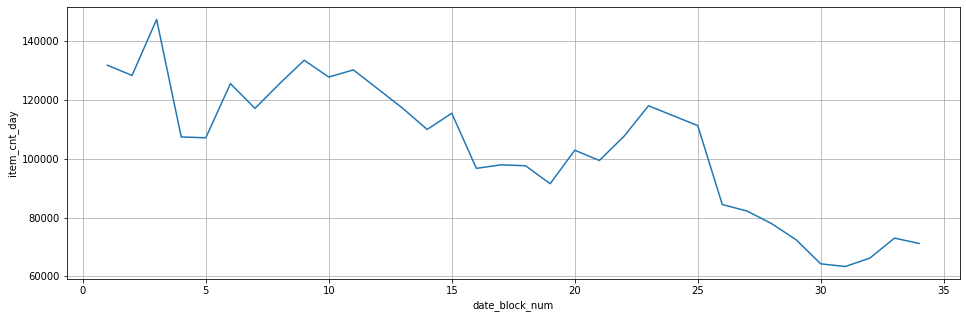

In [130]:
plt.figure(figsize=(16, 5))
plt.grid(True)
sns.lineplot(agg['date_block_num'], agg['item_cnt_day'])


/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date_block_num', ylabel='revenue'>

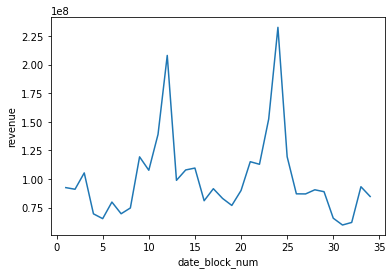

In [124]:
sns.lineplot(agg['date_block_num'], agg['revenue'])

/home/ivan/venvs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

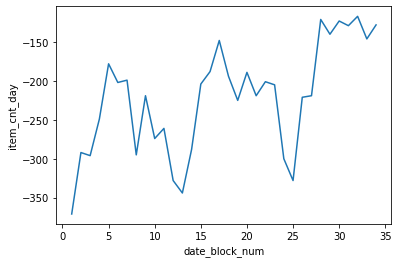

In [125]:
agg = df.loc[df['item_cnt_day'] <= 0].groupby('date_block_num').sum().reset_index()
sns.lineplot(agg['date_block_num'], agg['item_cnt_day'])

In [89]:
df.date.min(), df.date.max()

('01.01.2013', '31.12.2014')

In [94]:
len(df)

2935849

In [95]:
len(df.loc[df['item_cnt_day'] != -1.])

2928597

In [96]:
grouped = df.loc[df['item_cnt_day'] != -1.].groupby(['date_block_num', 'shop_id', 'item_id'])

In [99]:
train = grouped.agg({'item_price': 'mean', 'item_cnt_day': 'sum'})

In [104]:
train = train.reset_index()

In [135]:
train['item_freq'] = train['item_id'].map(train.item_id.value_counts())

(0.0, 8.0)

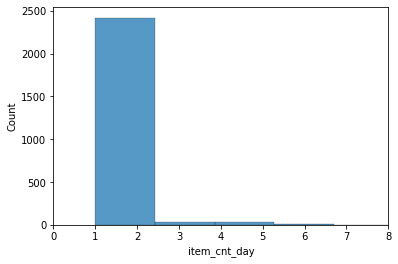

In [143]:
sns.histplot(train.loc[train['item_freq'] < 2].item_cnt_day, bins=150)
plt.xlim([0, 8])

(0.0, 8.0)

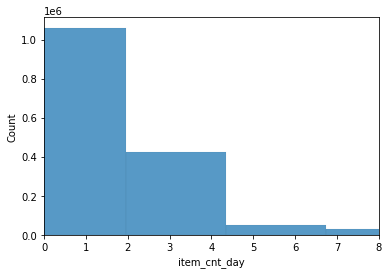

In [149]:
sns.histplot(train.item_cnt_day, bins=950)
plt.xlim([0, 8])

In [161]:
train.item_cnt_day.value_counts()

1.0       1060060
2.0        266165
3.0        103476
4.0         53480
5.0         32035
           ...   
1242.0          1
370.0           1
272.0           1
1209.0          1
507.0           1
Name: item_cnt_day, Length: 447, dtype: int64

In [109]:
train.loc[train['date_block_num'] == 12].item_id.value_counts()

6466     45
3732     45
2269     45
3734     45
1495     45
         ..
5165      1
11274     1
5101      1
17383     1
22149     1
Name: item_id, Length: 7546, dtype: int64

In [133]:
len(train)

1608245

In [132]:
train.item_id.value_counts().value_counts()

1       2520
2       1136
3        740
4        592
5        513
        ... 
415        1
1155       1
1123       1
1091       1
1279       1
Name: item_id, Length: 737, dtype: int64

In [ ]:
new_df = pd.DataFrame({'month': pd.Series([]), ''})

In [90]:
df['date'] = list(map(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'), df['date']))

In [91]:
df.date.min(), df.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-10-31 00:00:00'))

In [84]:
datetime.datetime.strptime('01.01.2013', '%d.%m.%Y')

datetime.datetime(2013, 1, 1, 0, 0)

In [76]:
df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [ ]:
df['date'] = map(lambda x: )

In [81]:
type(df.loc[0].date), type(df.loc[2935848].date)

(str, str)

<AxesSubplot:xlabel='item_id', ylabel='Count'>

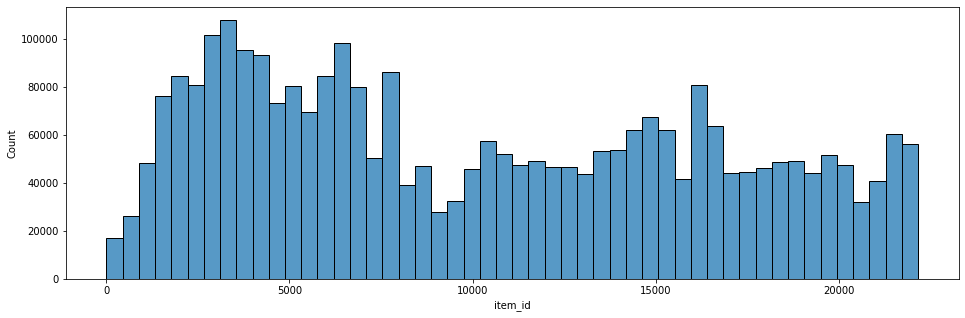

In [7]:
plt.figure(figsize=(16, 5))
sns.histplot(df.item_id, bins=50)

In [62]:
df['item_freq'] = df['item_id'].map(df.item_id.value_counts())

In [63]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_freq
0,02.01.2013,0,59,22154,999.00,1.0,59
1,03.01.2013,0,25,2552,899.00,1.0,9
2,05.01.2013,0,25,2552,899.00,-1.0,9
3,06.01.2013,0,25,2554,1709.05,1.0,1
4,15.01.2013,0,25,2555,1099.00,1.0,56


In [36]:
test = pd.read_csv('test.csv')

In [37]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [39]:
# item_freq = pd.concat([df, test]).item_id.value_counts()

In [48]:
test['item_freq'] = test['item_id'].map(df.item_id.value_counts())

In [55]:
test = test.fillna(-1)

In [50]:
test.fillna(-1).head()

,ID,shop_id,item_id,item_freq
0,0,5,5037,1089.0
1,1,5,5320,-1.0
2,2,5,5233,450.0
3,3,5,5232,130.0
4,4,5,5268,-1.0


In [51]:
test.fillna(-1).item_freq.value_counts()

-1.0       15246
 1.0        3486
 2.0        2814
 3.0        2646
 8.0        2646
           ...  
 2867.0       42
 1658.0       42
 1225.0       42
 1032.0       42
 540.0        42
Name: item_freq, Length: 1017, dtype: int64

### Доля новых объектов в тесте

In [68]:
np.sum(test['item_freq'] == -1.) / len(test)

0.0711764705882353

('01.01.2013', '31.12.2014')

In [65]:
df.item_freq

0           59
1            9
2            9
3            1
4           56
          ... 
2935844     17
2935845    118
2935846    561
2935847     23
2935848    118
Name: item_freq, Length: 2935849, dtype: int64

In [59]:
test.loc[test['item_freq'] == -1.].item_id.nunique()

363

In [57]:
test.loc[test['item_freq'] == -1.].item_id.value_counts()

10203    42
17858    42
3571     42
3579     42
3627     42
         ..
7094     42
13251    42
13275    42
15330    42
14383    42
Name: item_id, Length: 363, dtype: int64

(0.0, 1000.0)

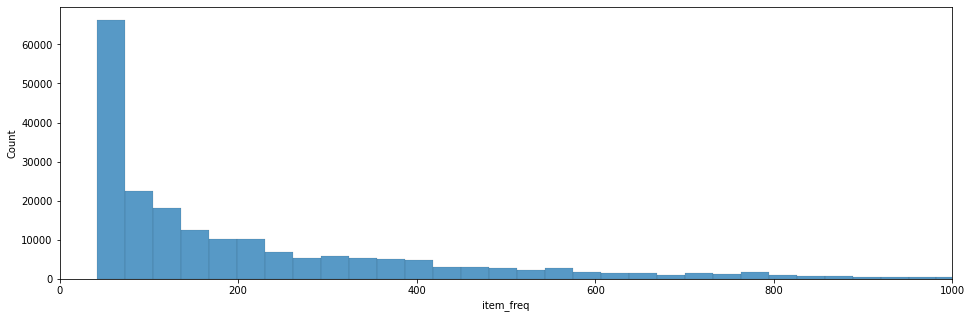

In [46]:
plt.figure(figsize=(16, 5))
sns.histplot(test.item_freq, bins=1000)
plt.xlim([0,1000])

In [29]:
item_freq = df.item_id.value_counts()

In [35]:
item_freq.loc[2552]

9

In [8]:
df.item_id.value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Length: 21807, dtype: int64

In [25]:
df.item_id.value_counts().value_counts()[:30]

1     2371
2     1054
3      669
4      540
5      470
6      436
8      368
7      346
10     303
11     298
9      287
12     269
13     253
15     252
14     242
16     215
17     209
18     209
19     198
20     196
21     185
22     165
23     165
30     147
25     144
24     144
29     139
31     139
27     138
28     135
Name: item_id, dtype: int64

In [11]:
np.array(df.item_id.value_counts())

array([31340,  9408,  9067, ...,     1,     1,     1])

In [17]:
len(df)

2935849

(0.0, 400.0)

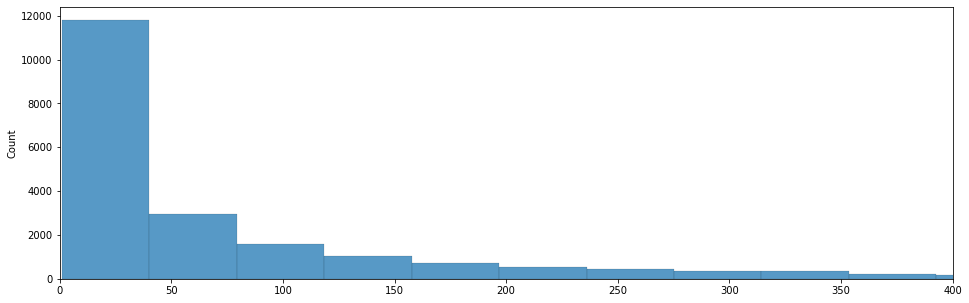

In [23]:
plt.figure(figsize=(16, 5))
sns.histplot(np.array(df.item_id.value_counts()), bins=800)
plt.xlim([0, 400])

In [ ]:
plt.figure(figsize=(16, 5))
plt.hist(df.item_id, bins=200) #, range(0, 2000))
plt.ylim([0,5000])

# Предсказания

In [152]:
np.ones(3) * 2

array([2., 2., 2.])

In [146]:
test_pred = pd.read_csv('test.csv')

In [172]:
submission = test_pred.loc[:,['ID']]
submission['item_cnt_month'] = np.ones(len(test_pred)).astype(float) * 0.2

submission.to_csv('submission.csv', index=False)

In [173]:
submission

,ID,item_cnt_month
0,0,0.2
1,1,0.2
2,2,0.2
3,3,0.2
4,4,0.2
...,...,...
214195,214195,0.2
214196,214196,0.2
214197,214197,0.2
214198,214198,0.2
